# Lasso Regression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a Pandas DataFrame
data = pd.read_csv('Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv')

# Extract the relevant features and target variable
X = data[['avg_max', 'avg_min', 'avg_rain']].values
y = data['Consumption'].values

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the alpha for Lasso Regression
alpha = 0.1

# Train the Lasso Regression model using the Coordinate Descent method
lasso = Lasso(alpha=alpha, max_iter=10000, tol=1e-4)
lasso.fit(X_train, y_train)

# Evaluate the Lasso Regression model on the validation set
y_pred = lasso.predict(X_val)

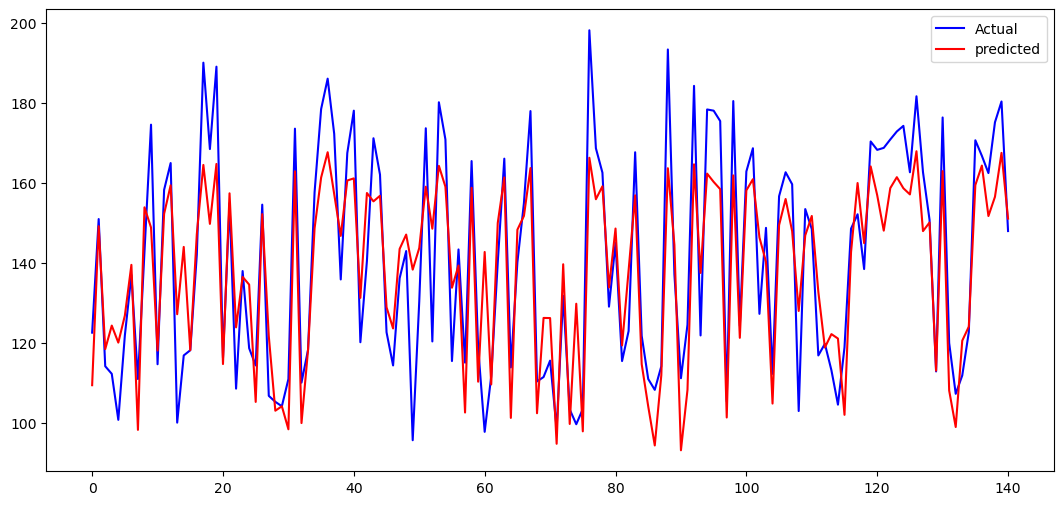

Mean Squared Error (MSE): 191.11809622490475
R-squared (R^2): 0.7507788037746251


In [17]:
# Plot the actual vs predicted graph for the validation set
plt.figure(figsize=(13,6))
plt.plot(y_val,color='blue',label='Actual')
plt.plot( y_pred,color='red',label='predicted')
#plt.plot([0, max(y_val)], [0, max(y_val)], 'k--')
plt.legend()
plt.show()

# Calculate the Mean Squared Error (MSE) and R-squared (R^2) for the validation set
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R^2):', r2)